In [1]:
import covid_19_pipeline as cp
from plotly import graph_objs as go
from plotly.offline import iplot
import random

In [2]:
COUNTRY = 'Mozambique'
CANTON = 'ZH'

# data
df_global, df_local = cp.covid_pipe()

# json: https://gist.githubusercontent.com/mbostock/4207744/raw/3232c7558742bab53227e242a437f64ae4c58d9e/readme-swiss.json

In [41]:
def plot_covid_new(REGION, local=False):
    
    if local:
        df = df_local[df_local.canton == REGION]
    else:
        df = df_global[df_global.country == REGION]
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df.date,
                    y=df.new_cases,
                    name='new cases',
                    marker_color='#d91424'
                    ))
    fig.add_trace(go.Bar(x=df.date,
                    y=df.new_fatal,
                    name='new fatalities',
                    marker_color='#000000'
                    ))

    fig.add_trace(go.Scatter(x=df.date, 
                             y=df.ma_cases,
                             name = 'Moving Average Cases (7 days)',
                             marker_color = '#db3548',
                             line=dict(color='firebrick', width=1,
                                  dash='dot')))
    
    fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title=f'Daily changes in Covid-19 cases for {REGION}',
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='New Cases/Fatalities',
            gridcolor='#e3e3e3'
        ),
        xaxis=dict(
            title='Date'),
        legend=dict(
            x=0.75,
            y=1.27,
            bgcolor='#FFFFFF',
            bordercolor='#FFFFFF'
        ),
        barmode = 'group',
        bargap=0.15, # gap between bars of adjacent location coordinates.
        bargroupgap=0.1 # gap between bars of the same location coordinate.
    )

    fig.show()

In [42]:
def plot_covid_total(REGION, local=False):

    if local:
        df = df_local[df_local.canton == REGION]
    else:
        df = df_global[df_global.country == REGION]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.date,
                    y=df.total_cases,
                    name='Total cases',
                    marker_color='#d91424',
                    fill='tonexty'
                    ))
    fig.add_trace(go.Scatter(x=df.date,
                    y=df.total_fatal,
                    name='Total fatalities',
                    marker_color='#000000',
                    fill = 'tozeroy'
                    ))


    fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        title=f'Total Covid-19 cases/fatalities for {REGION}',
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='Total Cases/Fatalities',
            gridcolor='#e3e3e3'
        ),
        xaxis=dict(
            title='Date'),
        legend=dict(
            x=0.75,
            y=1.27,
            bgcolor='#FFFFFF',
            bordercolor='#FFFFFF'
        ),
        barmode = 'group',
        bargap=0.15, # gap between bars of adjacent location coordinates.
        bargroupgap=0.1 # gap between bars of the same location coordinate.
    )

    fig.show()

# Country

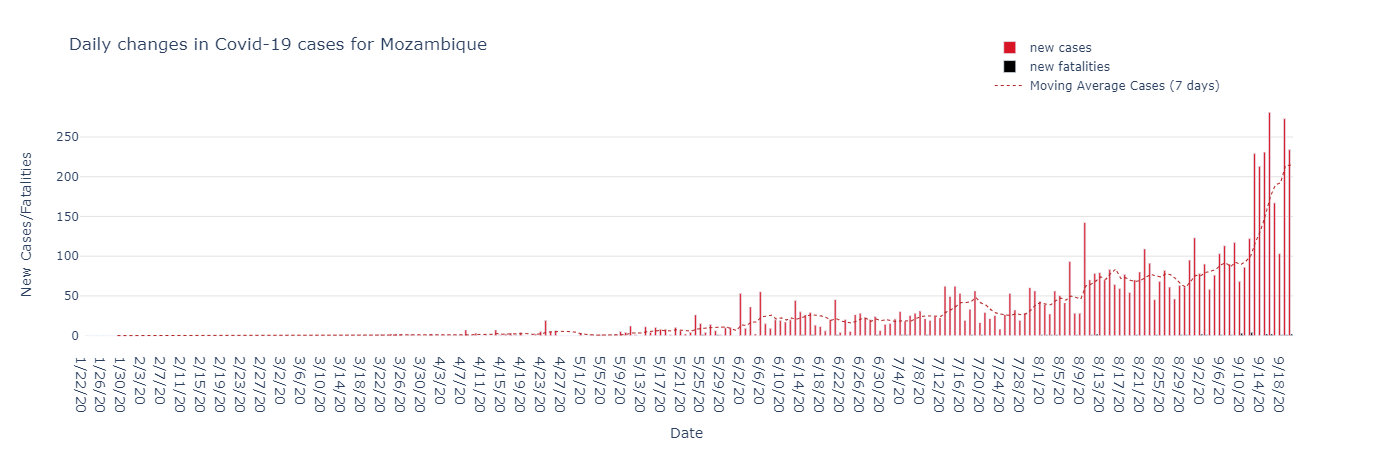

In [43]:
plot_covid_new(REGION = COUNTRY)

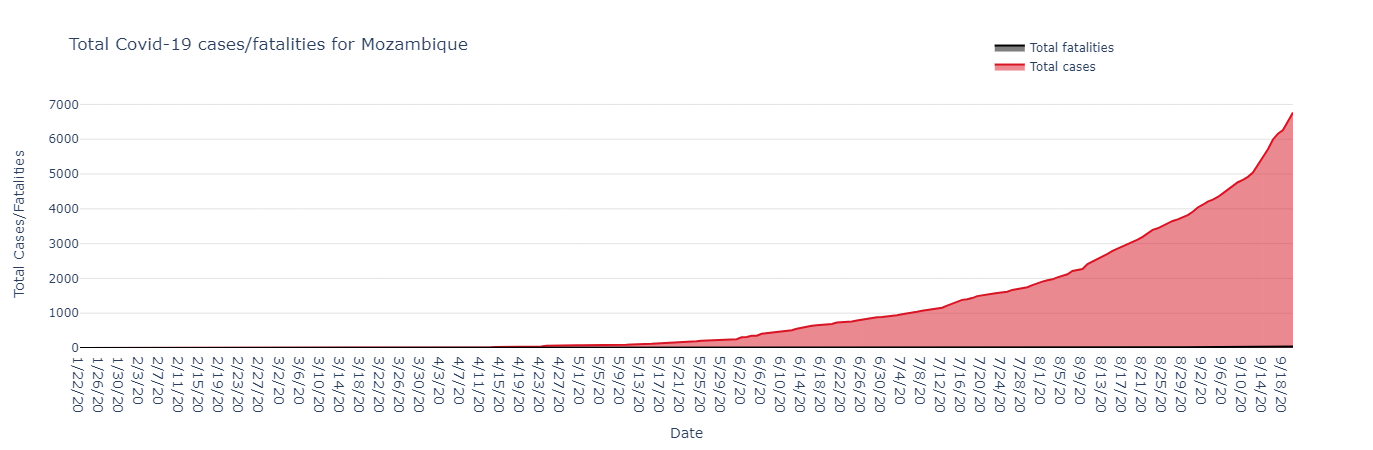

In [44]:
plot_covid_total(REGION=COUNTRY)

# Switzerland 

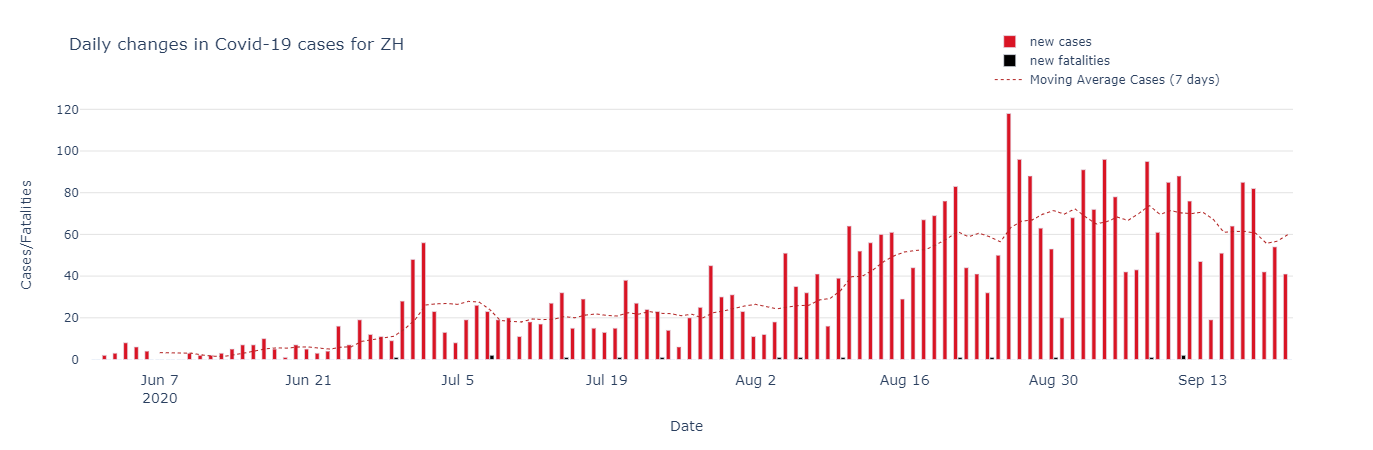

In [39]:
plot_covid_new(REGION=CANTON, local=True)

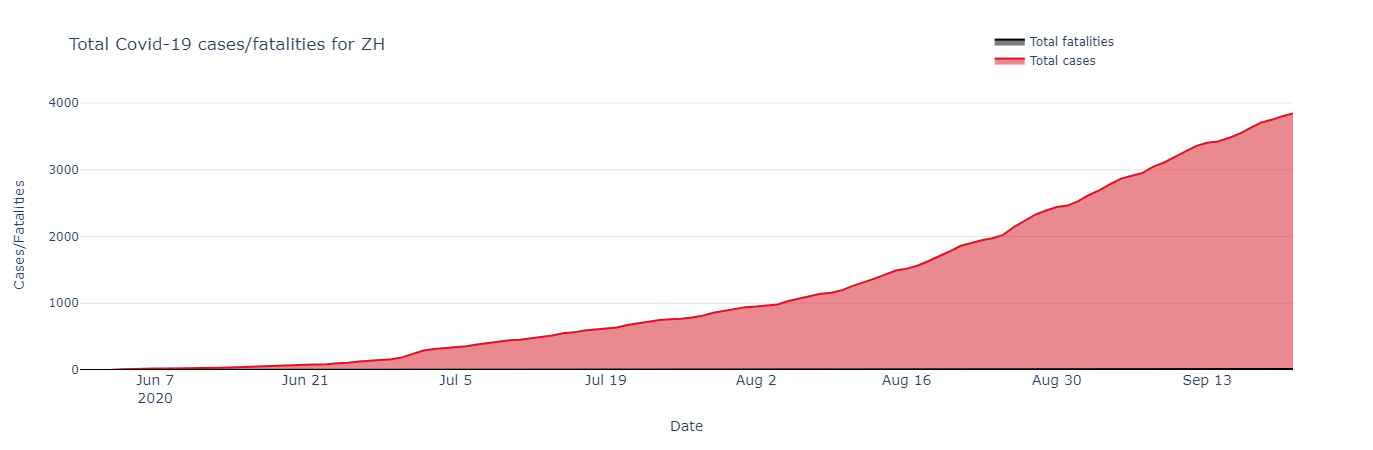

In [40]:
plot_covid_total(REGION=CANTON, local=True)

In [53]:
Canton_Names ={'ZH': 'Zürich',
'BE': 'Bern',
'LU': 'Luzern',
'UR': 'Uri',
'SZ': 'Schwyz',
'OW': 'Obwalden',
'NW': 'Nidwalden',
'GL': 'Glarus',
'ZG': 'Zug',
'FR': 'Freiburg',
'SO': 'Solothurn' ,
'BS': 'Basel-Stadt',
'BL': 'Basel-Landschaft',
'SH': 'Schaffhausen',
'AR': 'Appenzell',
'AI': 'Appenzell',
'SG': 'St. Gallen', 
'GR': 'Graubünden', 
'AG': 'Aargau', 
'TG': 'Thurgau', 
'TI': 'Tessin', 
'VD': 'Waadt', 
'VS': 'Wallis', 
'NE': 'Neuenburg',
'GE': 'Genf', 
'JU': 'Jura'}